<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/catia_dev/signal_processing_catia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Introduction here

#Methodology

Brief description here

##Data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fft
import sklearn
from scipy.io import wavfile
import scipy.io
import os
from scipy import signal
from IPython.display import Audio
     


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [4]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal = '/content/drive/MyDrive/signal processing/males/'

fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([mal+x for x in os.listdir(mal)])

In [5]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate (in samples/sec), data
maudios = np.array([wavfile.read(wav_mname)for wav_mname in mals]) # samplerate (in samples/sec), data

<ipython-input-5-0b24331ea27d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate (in samples/sec), data
<ipython-input-5-0b24331ea27d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  maudios = np.array([wavfile.read(wav_mname)for wav_mname in mals]) # samplerate (in samples/sec), data


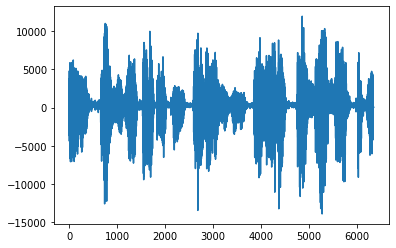

In [6]:
sns.lineplot(data = faudios[0][1][0::10], )

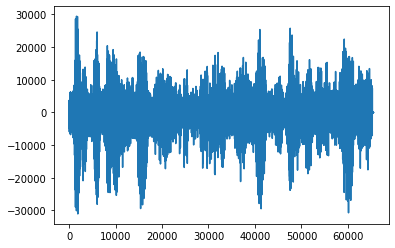

In [7]:
sns.lineplot(data = maudios[0][1])

In [8]:
faudios.shape

(51, 2)

In [9]:
maudios.shape

(51, 2)

51 files, monochannel

##Filtering data

In [10]:
f_data = []
m_data = []

for i in faudios:
  f_data.append(i[1])

for i in maudios:
  m_data.append(i[1])


Our original sample had a sampling frequency of 16000 samples/sec.

fs = sample frequency.

The voiced speech of a typical adult male will have a fundamental frequency from 85 to 155 Hz, and that of a typical adult female from 165 to 255 Hz.
However, we need to account to harmonics and not only the fundamental frequency.

Because of tis, although speech typically covers frequencies from 30 to 10,000 Hz, most of the energy is in the range from 200 to 3500 Hz (Sobolewski, 2003).

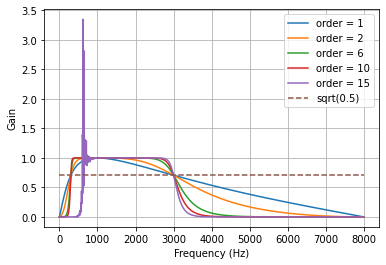

In [78]:
# visualizing the band-pass filter: 

for order in [1, 2, 6, 10, 15]:
  fs = 16000
  h_cut = 3000
  l_cut= 300
  b, a = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs)
  w, h = signal.freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.show()




In [76]:
order = 10
fs = 16000
h_cut = 3500
l_cut= 200

filtered_f=[]
filtered_m = []


for data in f_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_f.append(y)

for data in m_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_m.append(y)


wn = Audio(y, rate=16000, autoplay=True) ## hear thhe last audio
display(wn)

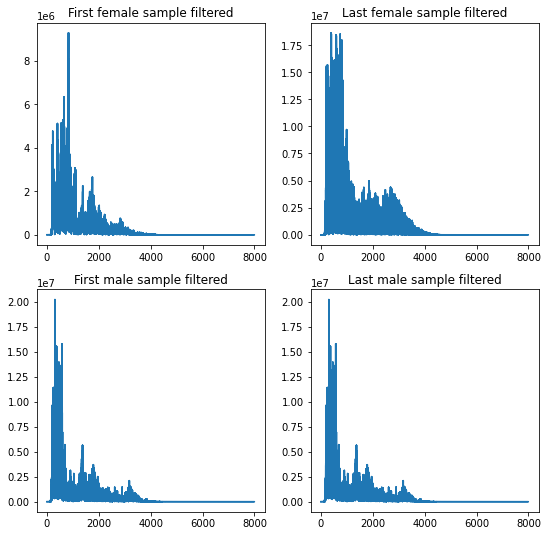

In [84]:
# plotting first and last sample for verification

y_f1 = filtered_f[0]
y_f2 = filtered_f[-1]
y_m1 = filtered_m[0]
y_m2 = filtered_m[-1]

yf1 = fft.fft(y_f1)
yf2 = fft.fft(y_f2)
ym1 = fft.fft(y_m1)
ym2 = fft.fft(y_m2)

xf1 = fft.fftfreq(len(yf1), 1 / fs)
xf2 = fft.fftfreq(len(yf2), 1 / fs)
xm1 = fft.fftfreq(len(ym1), 1 / fs)
xm2 = fft.fftfreq(len(ym2), 1 / fs)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(abs(xf1), np.abs(yf1))
plt.title('First female sample filtered')
plt.subplot(2, 2, 2)
plt.plot(abs(xf2), np.abs(yf2))
plt.title('Last female sample filtered')
plt.subplot(2, 2, 3)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('First male sample filtered')
plt.subplot(2, 2, 4)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Last male sample filtered')


plt.show()

to be continued ...

#Results and Conclusions

Discussion here

#References

1.   John S. Sobolewski, Data Transmission Media, Editor(s): Robert A. Meyers,Encyclopedia of Physical Science and Technology (Third Edition), Academic Press,
2003, Pages 277-303, ISBN 9780122274107, https://doi.org/10.1016/B0-12-227410-5/00165-4. (https://www.sciencedirect.com/science/article/pii/B0122274105001654)

2. A. Majkowski, M. Kołodziej, J. Pyszczak, P. Tarnowski and R. J. Rak, "Identification of Gender Based on Speech Signal," 2019 IEEE 20th International Conference on Computational Problems of Electrical Engineering (CPEE), 2019, pp. 1-4, doi: 10.1109/CPEE47179.2019.8949078.

2.   S. Jadav, "Voice-Based Gender Identification Using Machine Learning," 2018 4th International Conference on Computing Communication and Automation (ICCCA), 2018, pp. 1-4, doi: 10.1109/CCAA.2018.8777582.

3. Ali, Md & Islam, Md & Hossain, Md Alamgir. (2012). GENDER RECOGNITION SYSTEM USING SPEECH SIGNAL. Vol.2. 

4. Submitter, ICSMDI 2021 and Jena, Bhagyalaxmi and Mohanty, Anita and Mohanty, Subrat Kumar, Gender Recognition and Classification of Speech Signal (May 25, 2021). Proceedings of the International Conference on Smart Data Intelligence (ICSMDI 2021), Available at SSRN: https://ssrn.com/abstract=3852607


